In [1]:
!pip install Pillow

In [2]:
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [3]:
import pandas as pd
import glob
path = '/content/drive/MyDrive/Semester/8th Semester/CSE463/22301268_NowrinSanjana_Lab1/Task2/Dataset1'
files = glob.glob(path + '/*.jpg')

In [4]:
# imgs_jpeg = ["im1.jpeg", "im2.jpeg", "im3.jpeg", "im4.jpeg", "im5.jpeg", "im6.jpeg", "im7.jpeg", "im8.jpeg", "im9.jpeg", "im10.jpeg"]
img_l = []
gray_scale = []
rgb_scale = []
for imgs in files:
    img = cv2.imread(imgs)
    img_l.append(img)
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_scale.append(grayscale)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgb_scale.append(rgb)

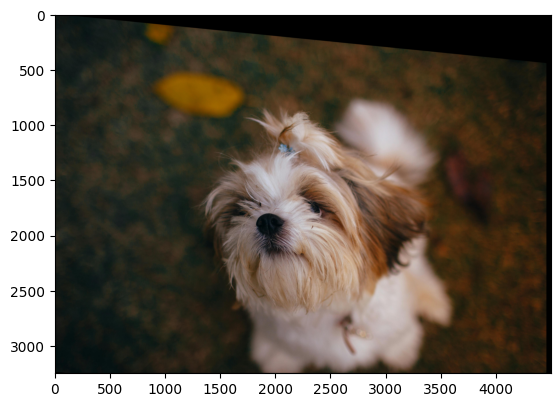

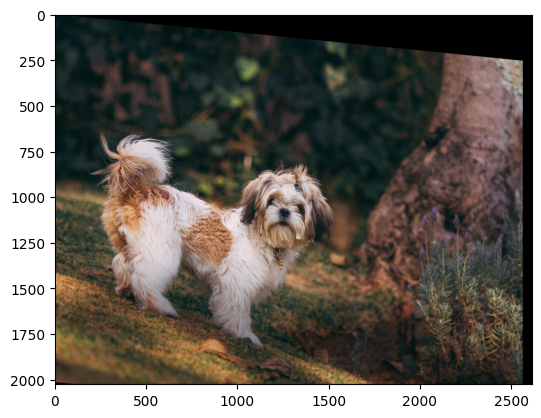

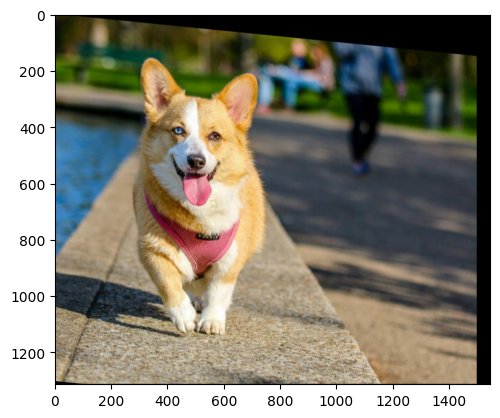

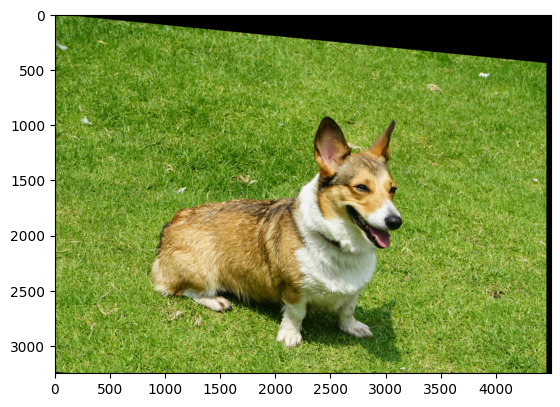

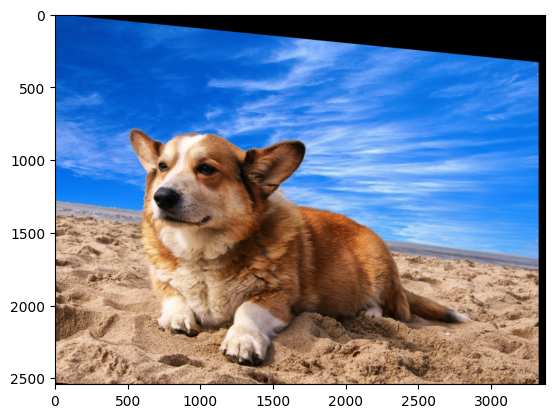

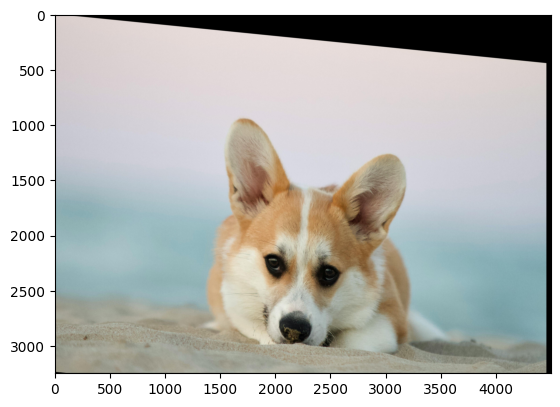

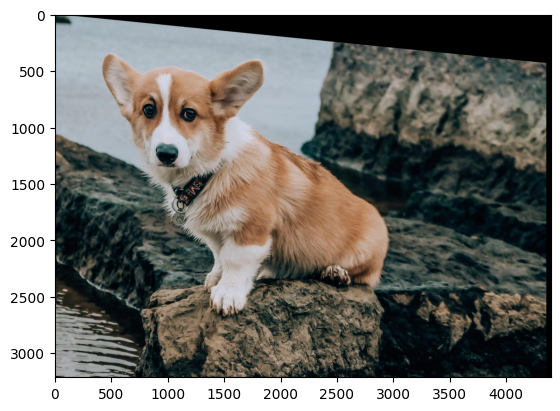

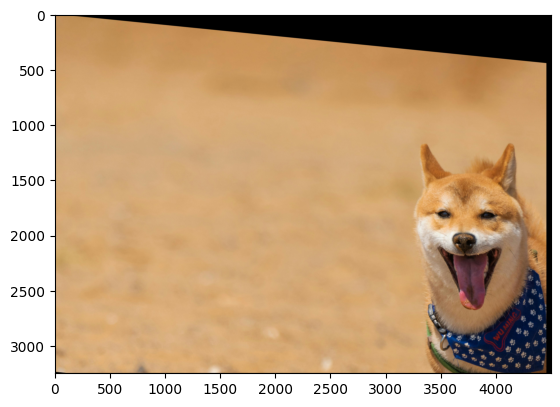

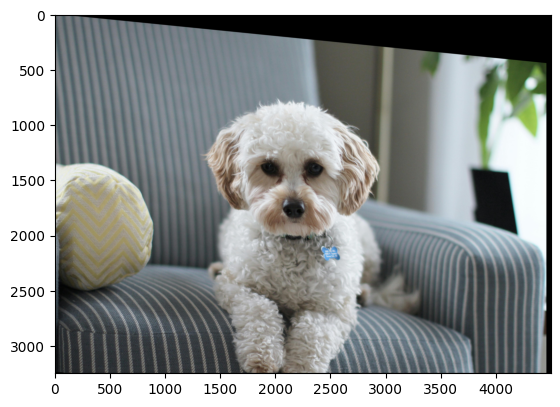

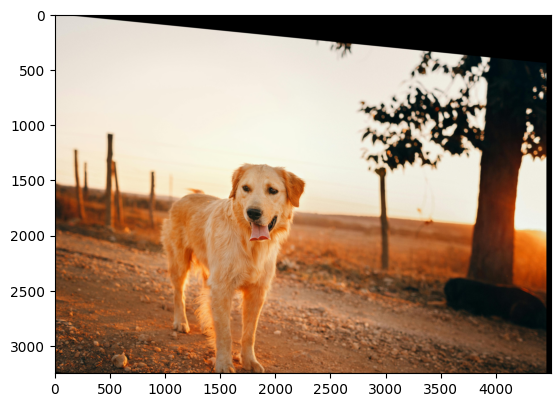

In [5]:
trans_5 = []
for img in rgb_scale:
    # plt.imshow(img)
    # plt.show()
    #Crop
    cropped_image = img[50:3300, 500:5000]
    # plt.imshow(cropped_image)
    # plt.show()

    #Translate/Shift
    shift_x = -50
    shift_y = -10

    # Create the translation matrix
    translation_matrix = np.float32([[1, 0, shift_x], [0, 1, shift_y]])

    # Apply the translation
    translated_image = cv2.warpAffine(cropped_image, translation_matrix, (cropped_image.shape[1], cropped_image.shape[0]))

    #Resize
    width = int(translated_image.shape[1] * 0.5)
    height = int(translated_image.shape[0] * 0.5)
    dim = (width, height)
    resized_image = cv2.resize(translated_image, dim, interpolation = cv2.INTER_AREA)
    # plt.imshow(resized_image)
    # plt.show()

    #Sheer
    height, width = resized_image.shape[:2]
    shear_x = 0.0  # Shear along the x-axis
    shear_y = 0.1  # No shear along the y-axis

    shear_matrix = np.float32([
        [1, shear_x, 0],  # Shear along the x-axis
        [shear_y, 1, 0]   # No shear along the y-axis
    ])
    sheared_image = cv2.warpAffine(resized_image, shear_matrix, (width + int(shear_x * height), height))

    #Stretch
    stretch_x = 2
    stretch_y = 2
    stretch_matrix = np.float32([
        [stretch_x, 0, 0],
        [0, stretch_y, 0]
    ])
    stretched_image = cv2.warpAffine(sheared_image, stretch_matrix, (int(width * stretch_x), int(height * stretch_y)))
    trans_5.append(stretched_image)

for l in trans_5:
    plt.imshow(l)
    plt.show()

# Crop:
# To cut the unnecessary parts from the image and it also helps to keep focus on the key point so that I use crop as the nature part or white image was not needed .

#Shift
#Shifted the picture to the left and a bit upward to make the picture a bit alligned to work.

# Resize:
# Resize helps to convert images into the same size for better observation.

# Shear:
# It changes the form of images along a specific axis to create a different perception angle. It helps to modify image when camara angle varies and to fix that I used shear.

# Stretch:
# To adjust a wider or narrower picture to a perfect shape I used stretch.

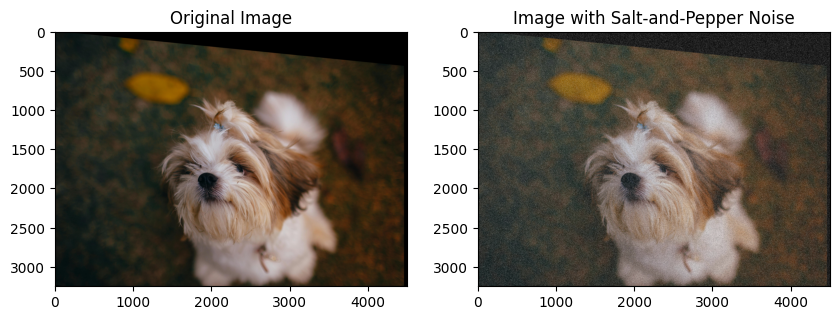

In [ ]:
for img in trans_5:
    row,col,ch= img.shape

    prob = 0.03 # Probability of noise (0.02 means 2% of the pixels will be noisy)

    # Generate random noise
    noisy_image = np.copy(img)
    num_salt = np.ceil(prob * img.size * 1.6).astype(int)  # Number of 'salt' pixels
    num_pepper = np.ceil(prob * img.size * 1).astype(int)  # Number of 'pepper' pixels

    # Apply 'salt' noise (white pixels)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Apply 'pepper' noise (black pixels)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy_image[coords[0], coords[1]] = 0

    # Display the original and noisy images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img.astype(np.uint8))

    plt.subplot(1, 2, 2)
    plt.title("Image with Salt-and-Pepper Noise")
    plt.imshow(noisy_image.astype(np.uint8))
    plt.show()

In [ ]:
random_noise = np.array(coords)

# Flatten the 3D noise array into 1D for histogram plotting
flattened_noise = random_noise.flatten()

# Plot the histogram of the generated Gaussian noise
plt.hist(flattened_noise, bins=80, density=True, alpha=0.7, color='r')
plt.title('Generated Random Noise')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('histogram.jpg')
plt.show()